In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/down_sample.csv')[['Subreddit', 'simp_lem']]

In [4]:
df.head()

,Subreddit,simp_lem
0,0,i hate how i feel when i get interested in som...
1,0,how to make friend can someone suggest somethi...
2,0,so today wa my birthday 9 11 and a i wa hoping...
3,0,having a hard time just need someone to say i ...
4,0,anti depressant inducing trip like state any o...


In [5]:
X = df.drop(columns='Subreddit')
y = df['Subreddit']

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify = y, random_state=42)

In [6]:
tvec = TfidfVectorizer()
tvec.fit(X_train['simp_lem'])
X_train_tv = pd.DataFrame(tvec.transform(X_train['simp_lem']).todense(), columns = tvec.get_feature_names())
X_test_tv = pd.DataFrame(tvec.transform(X_test['simp_lem']).todense(), columns = tvec.get_feature_names())

In [7]:
rf = RandomForestClassifier(verbose=1)

rf_params = {
    'n_estimators' : [100, 150, 200],
    'max_depth'    : [None, 5, 4]
}

gs = GridSearchCV(rf, param_grid=rf_params, cv= 5)

In [8]:
gs.fit(X_train_tv, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [9]:
gs.best_params_

{'max_depth': None, 'n_estimators': 200}

In [10]:
gs.best_score_

0.7463555555555557

In [11]:
gs.score(X_train_tv, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.0s finished


0.9999555555555556

In [12]:
gs.score(X_test_tv, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


0.7596

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report

In [15]:
cm = confusion_matrix(y_test, gs.predict(X_test_tv))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=gs.classes_)

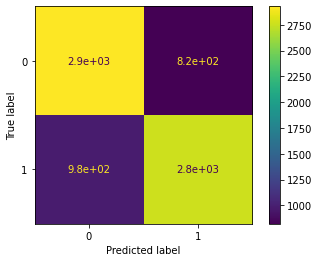

In [17]:
disp.plot();